In [1]:
import seaborn.objects as so
import pandas as pd
from seaborn import load_dataset
import polars as pl
networks = pl.from_pandas(
    pd.read_csv('../../../tmp/brain_networks.csv', header=[0, 1, 2], index_col=0)
    .rename_axis("timepoint")
    .stack([0, 1, 2])
    .groupby(["timepoint", "network", "hemi"])
    .mean()
    .unstack("network")
    .reset_index()
    .query("timepoint < 100")
)

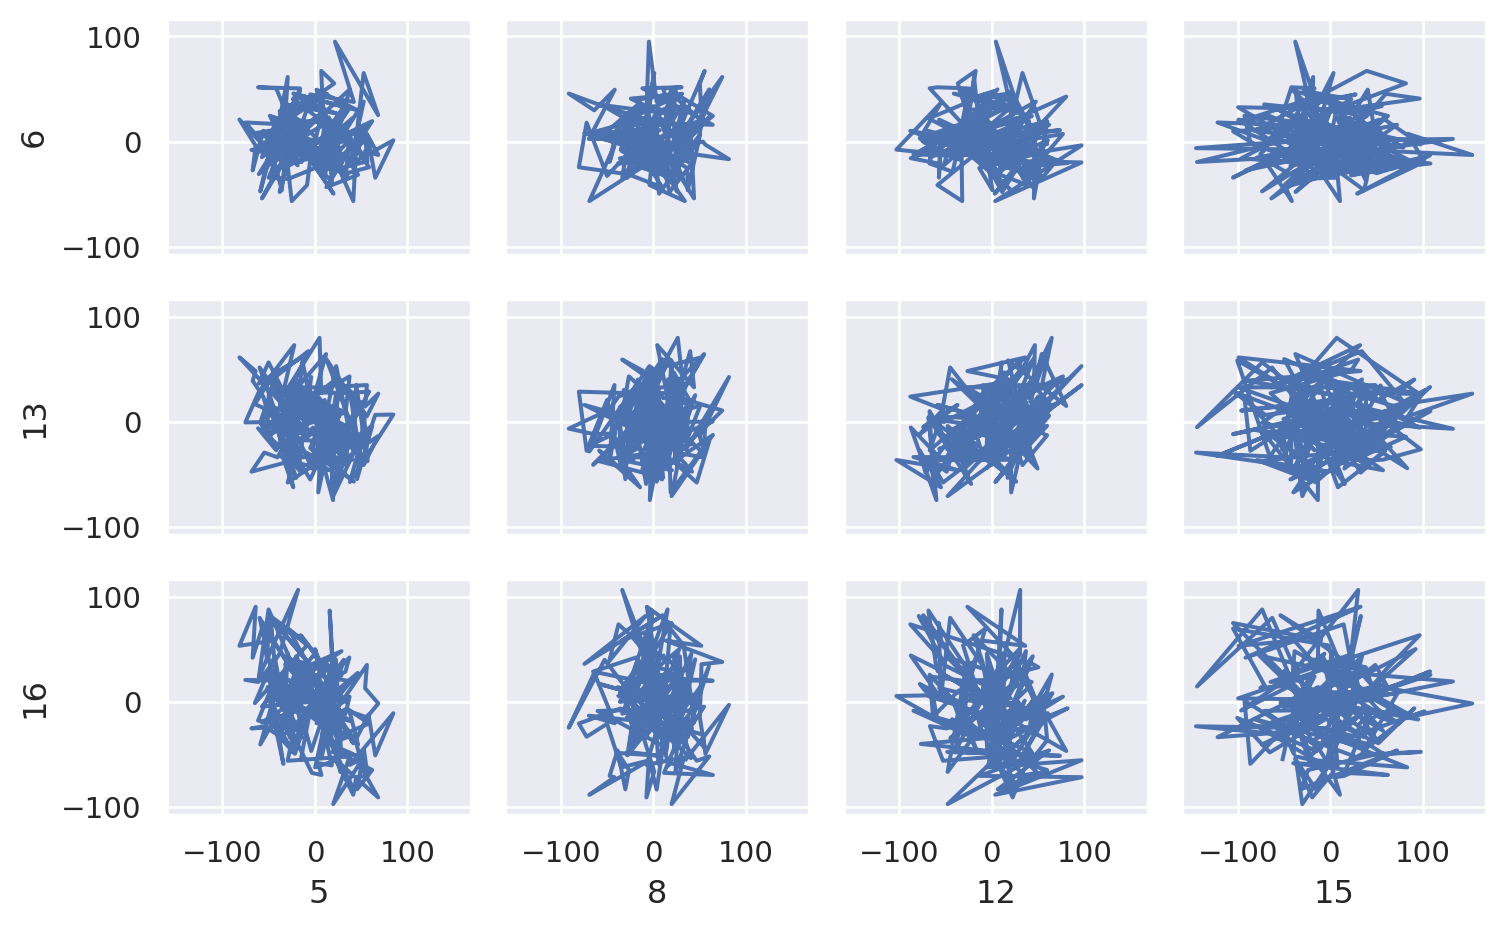

In [2]:
p = (
    so.Plot(networks)
    .pair(
        x=["5", "8", "12", "15"],
        y=["6", "13", "16"],
    )
    .layout(size=(8, 5))
    .share(x=True, y=True)
)
p.add(so.Paths())

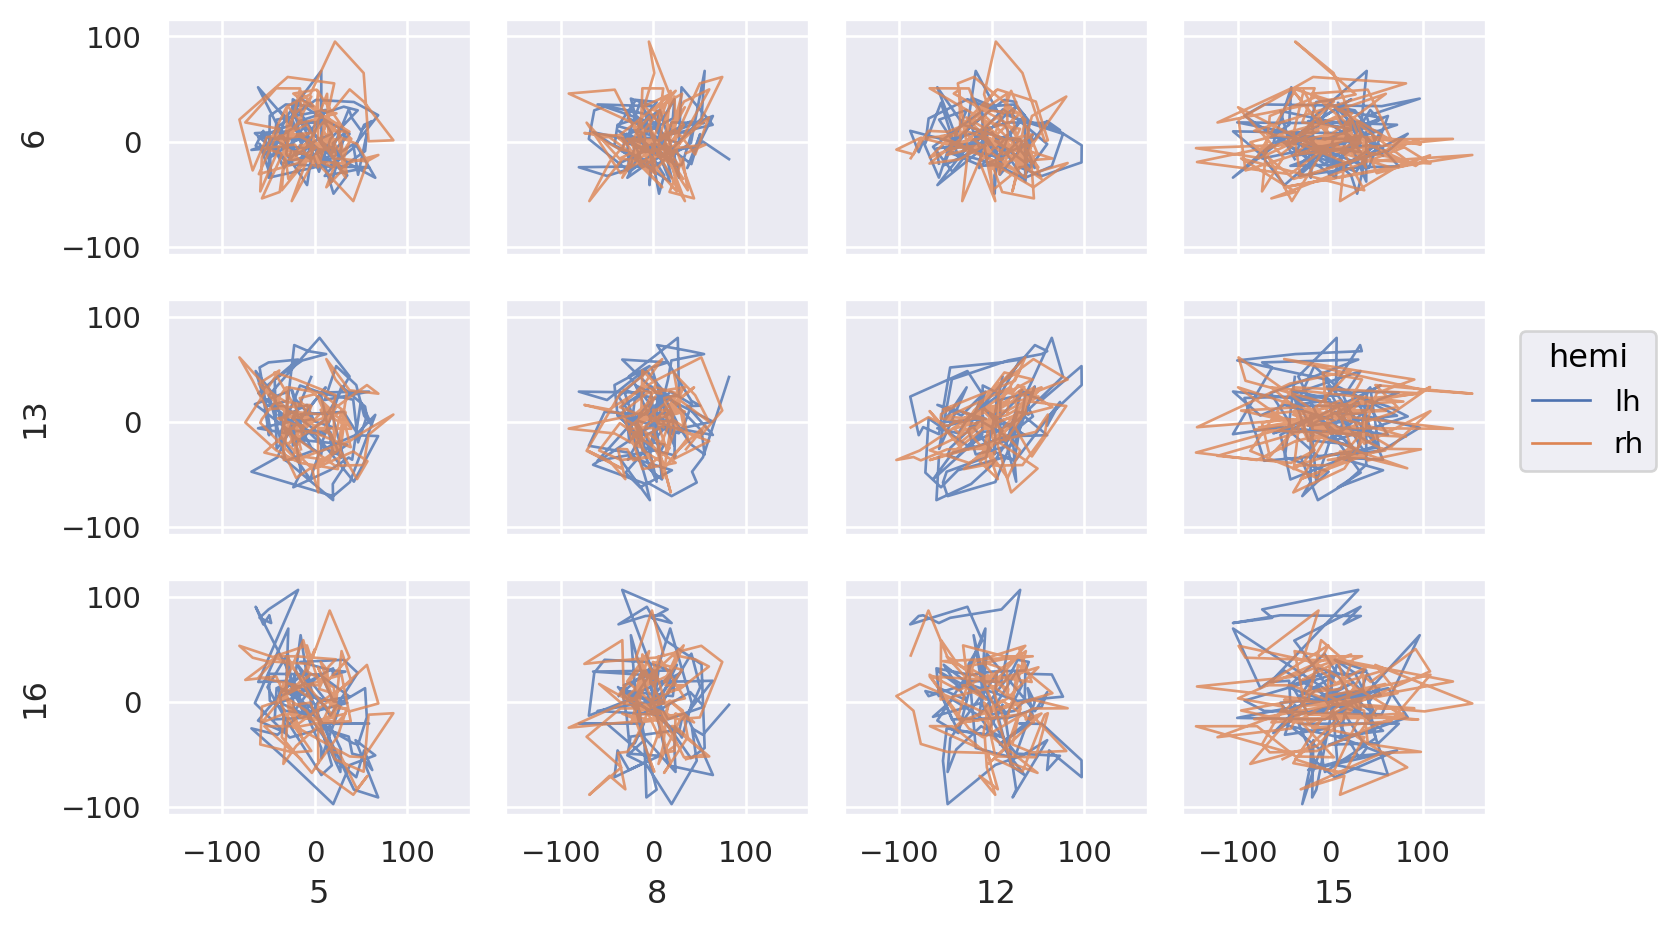

In [3]:
p.add(so.Paths(linewidth=1, alpha=.8), color="hemi")